In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# **`Load the datase`**

In [136]:
df = pd.read_csv("BigMart_Sales.csv")

In [137]:
# Show Dataset
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [138]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [139]:
# Check Nulls
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# **`Handling missing values`**

In [140]:
df['Item_Weight'].fillna(df['Item_Weight'].mode()[0], inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

<ipython-input-140-f2e2c53a9db7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mode()[0], inplace=True)
<ipython-input-140-f2e2c53a9db7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [141]:
# Then Check nulls
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# **`Data Visualization`**

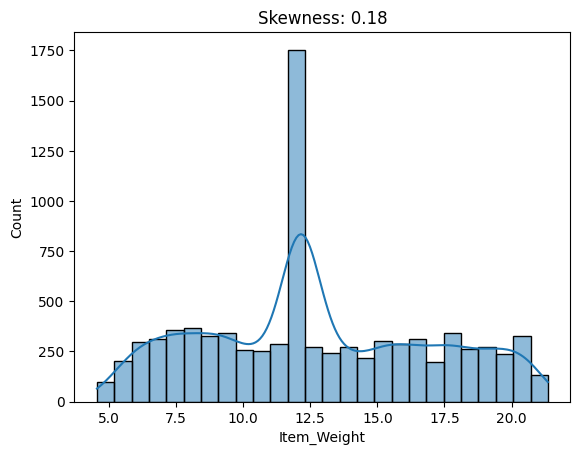

In [142]:
sns.histplot(df['Item_Weight'], kde=True)
plt.title(f"Skewness: {df['Item_Weight'].skew():.2f}")
plt.show()

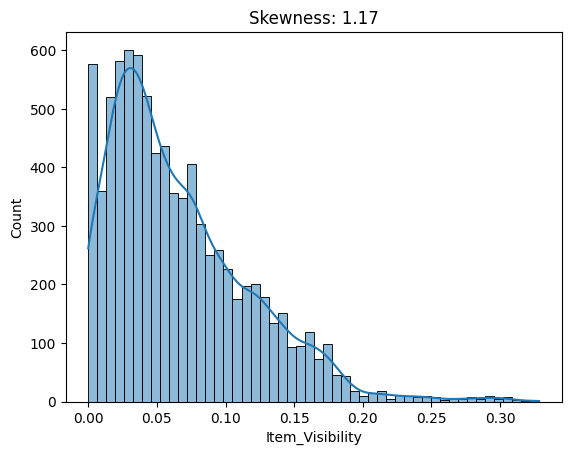

In [143]:
sns.histplot(df['Item_Visibility'], kde=True)
plt.title(f"Skewness: {df['Item_Visibility'].skew():.2f}")
plt.show()

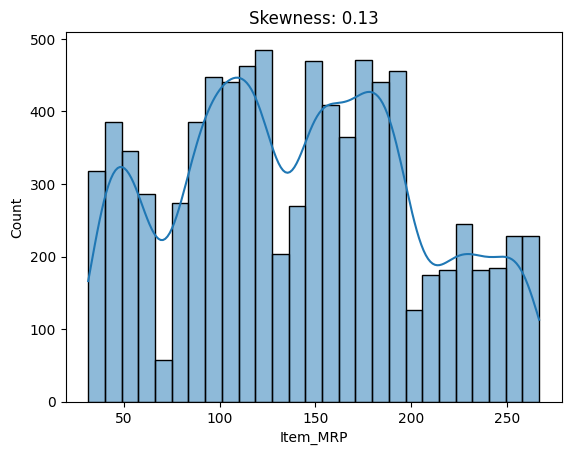

In [144]:
sns.histplot(df['Item_MRP'], kde=True)
plt.title(f"Skewness: {df['Item_MRP'].skew():.2f}")
plt.show()

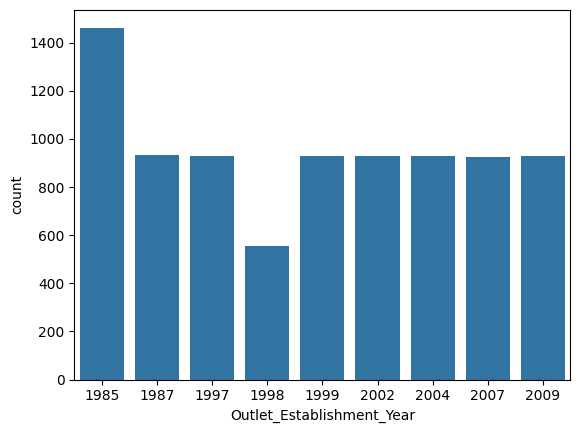

In [146]:
 # Creating Outlet Age feature
sns.countplot(x=df['Outlet_Establishment_Year'])
plt.show()

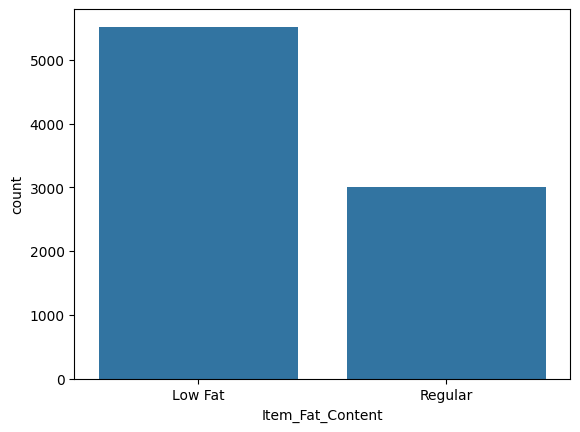

In [149]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
sns.countplot(x=df['Item_Fat_Content'])
plt.show()

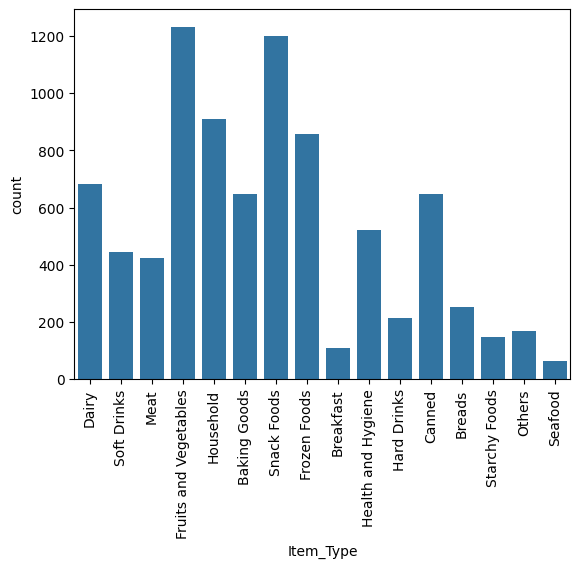

In [150]:
sns.countplot(x=df['Item_Type'])
plt.xticks(rotation=90)
plt.show()

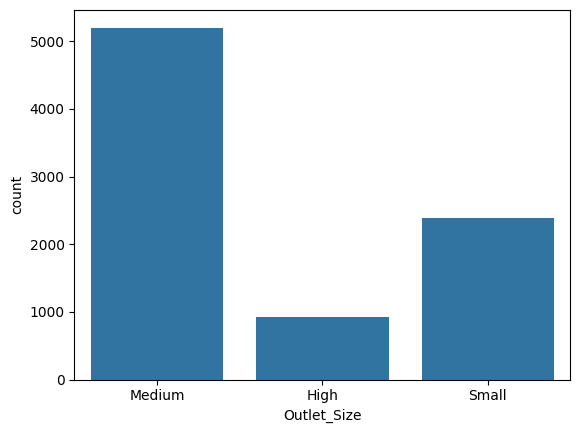

In [151]:
sns.countplot(x=df['Outlet_Size'])
plt.show()

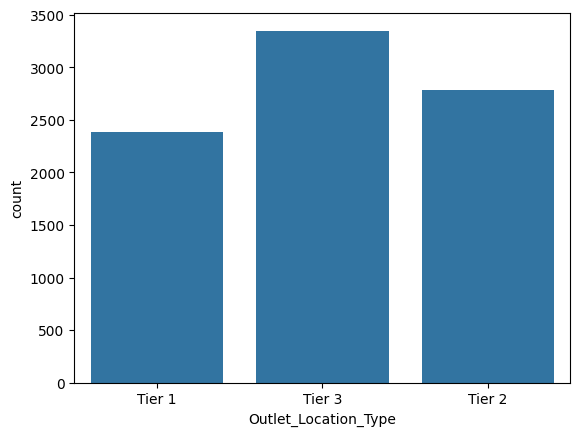

In [152]:
sns.countplot(x=df['Outlet_Location_Type'])
plt.show()

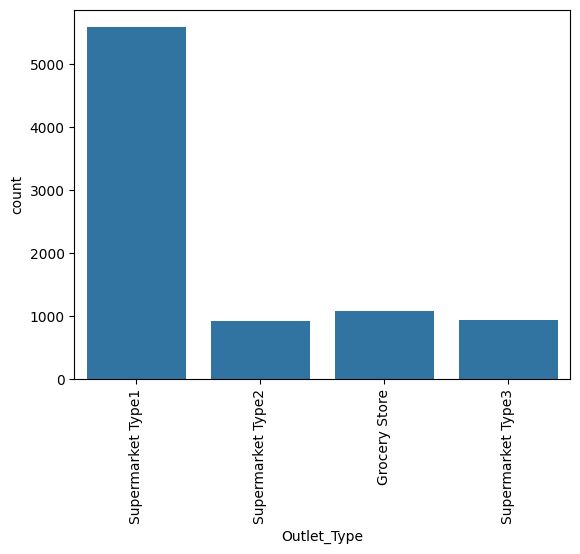

In [153]:
sns.countplot(x=df['Outlet_Type'])
plt.xticks(rotation=90)
plt.show()

# **`Feature Engineering`**

In [154]:
df['Item_Visibility'] = df['Item_Visibility'].apply(lambda x: np.log1p(x))  # Log transformation
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']

# **`Encoding categorical variables`**

In [155]:
le = LabelEncoder()
categorical_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,8523.0,779.714889,449.222377,0.000,395.500000,783.000000,1167.000000,1558.000000
Item_Weight,8523.0,12.736176,4.234540,4.555,9.310000,12.150000,16.000000,21.350000
Item_Fat_Content,8523.0,0.352693,0.477836,0.000,0.000000,0.000000,1.000000,1.000000
Item_Visibility,8523.0,0.057485,0.040425,0.000,0.025944,0.049927,0.082982,0.223108
Item_Type,8523.0,7.226681,4.209990,0.000,4.000000,6.000000,10.000000,15.000000
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Identifier,8523.0,4.722281,2.837201,0.000,2.000000,5.000000,7.000000,9.000000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8523.0,1.170832,0.600327,0.000,1.000000,1.000000,2.000000,2.000000
Outlet_Location_Type,8523.0,1.112871,0.812757,0.000,0.000000,1.000000,2.000000,2.000000


# **`Splitting data into features and target`**

In [157]:
x = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **`Model Training`**

In [158]:
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
_=xgb.fit(x_train, y_train)


# **`Model Evaluation`**

In [161]:
predictions_train = xgb.predict(x_train)
predictions_test = xgb.predict(x_test)

print("Train R² Score:", r2_score(predictions_train, y_train))
print("Test R² Score:", r2_score(predictions_test, y_test))

Train R² Score: 0.8428264215217132
Test R² Score: 0.3668491465230138
